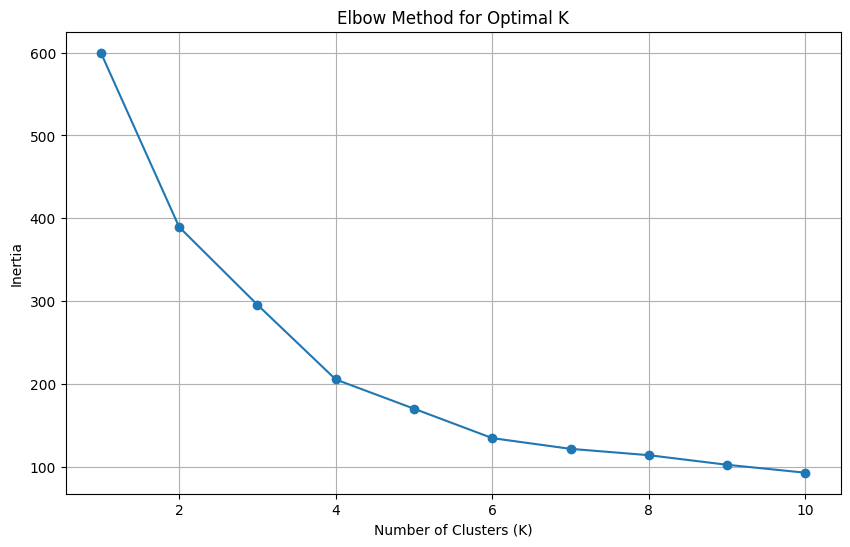

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         68.775862  55.275862           47.620690               41.706897
1        161.025000  32.875000           86.100000               81.525000
2         23.461538  25.769231           26.115385               74.846154
3         86.377778  26.733333           54.311111               40.911111
4        166.870968  44.387097           89.774194               18.483871


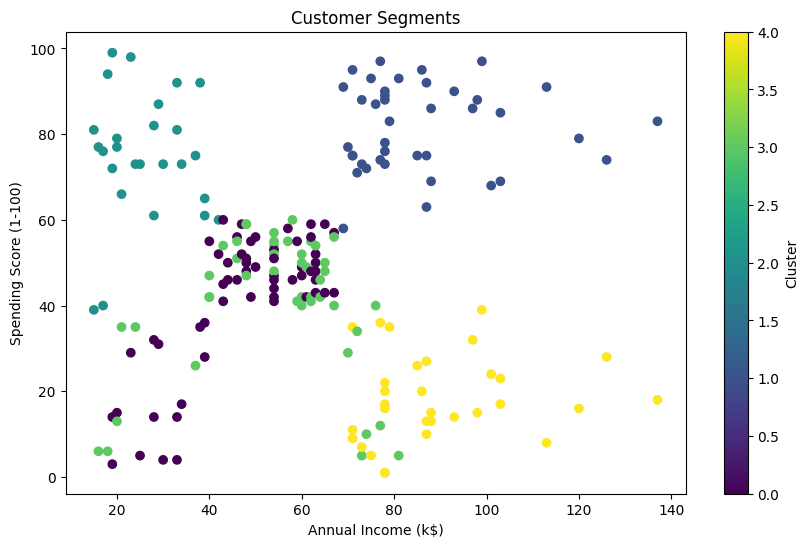

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Step 2: Select relevant features (excluding non-numeric columns)
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Step 5: Fit K-means with the chosen number of clusters (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Analyze the clusters
# Exclude non-numeric columns for aggregation
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Step 7: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()